In [ ]:
""" 
Generation of the secondary structure (2D)
1) Determine the possible pairings (WC and non-WC base pairs) using a pairing logic.
    Initialization:
        Create an empty list or set for the pairs.
        Create an an empty list or set for non-WC pairings.
    Run through the RNA sequence: 
        a. Set a counter i to 0. 
        b. Repeat as long as i < length(rna_sequence).

        i. Determine the current base: 
            - Set current_base to rna_sequence[i].
        ii. Check the pairing logic: 
            - If current_base == 'A', then: 
                - Search for a matching U in rna_sequence from index i+1 to the end. 
                - If found, add the pair (A, U) to the list.
            - If `current_base` == 'U', then:
                - Search for a matching `A` in `rna_sequence` from index `i+1` to the end.
                - If found, add the pair (U, A) to the list.
            - If `current_base` == 'G', then:
                - Search for a matching `C` in `rna_sequence` from index `i+1` to the end.
                - If found, add the pair (G, C) to the list.
            - If `current_base` == 'C`, then:
                - Search for a matching `G` in `rna_sequence` from index `i+1` to the end.
                - If found, add the pair (C, G) to the list.
        iii. Increment i: 
            - Increment i by 1.
        End of the loop: When i reaches the length of the RNA sequence
2) Create a graph structure to visualize the pairings.
    Create a graph:
        Node: Each base in the RNA.
        Edges: Connection between bases for the recognized pairs.
        Mark edges for WC base pairs (maybe a different color).
    Visualize the graph:
        Draw the nodes (bases).
        Draw the edges (left) (and highlight the difference between WC and non-WC base pairs).
3) Identify and store helical regions (cis-WC/WC) and non-WC pairings.
        In RNA structures, Watson-Crick (WC) pairings (A-U and G-C) are the most common types of base pairings that form helices. 
        Helical regions are therefore sequences that exhibit these interactions. On the other hand, non-WC pairings include other base interactions.
    Run through the RNA sequence to find non-WC-pairs (G-U, U-G, G-A, A-G, C-U, U-C, C-A, A-C) -> Maybe together with step 1?
4) Return the secondary structure as a matrix or as a graph.
"""

"""
Identification of RNA structural elements
    Analyze the secondary structure for structural elements (loops, helices, etc.).
        Define variables for helices, loops, hairpins and pseudoknots
        Identify helices
            Run through the sequence an identify base-pairs (A-U, G-C)
            Group neighboring base pairs to identify helices.
            Calculate the stability (e.g. based on the number of base pairs).
            Note the length and position of the most stable helices. 
        Identify and classify loops
            Identify positions of bases that do not form helices (e.g. unbound bases).
            Classify the loops:
            Single loops: single and closed.
            Multiple loops: Contain multiple branches.
            Internal loops: Are located within a helix.
            Terminal loops: Located at the end of an RNA chain.
            Note the positions and types of loops.
        Determine hairpins
            Search for hairpin loops that have a short loop between two base pairs.
            Note the positions of the identified hairpins.
        Analyzing pseudo nodes
            Check if there are overlaps between helices and loops to identify pseudo nodes.
            Note the positions of the pseudo nodes.
        Summary of the results
    Create a summary of the identified structural elements:
        Helices (with stability, length and position)
        Loops (with types and positions)
        Hairpins (with positions)
        Pseudoknots (with positions)
    Output of the results
        Output the summarized data.

    Categorized mating families (12 families, based on the interactions):
    1  A-U pairing: adenine-uracil pairing
    2  G-C pairing: guanine-cytosine pairing
    3  G-U pairing: Guanine-uracil pairing (rarer than A-U and G-C)
    4  Internal loop pairing: Base pairing in an inner region of a loop
    5  Bulge pairing: Unpaired bases in a loop structure
    6  Multi-loop pairing: Multiple loops in an RNA structure
    7  Pseudoknot: When a knot is formed by overlapping structural segments
    8  Stem-loop structure: Connection between a rigid stem and a modular loop
    9  Kinks: Kinking of the RNA structure
    10 Coils: Pairings that form spirals in the structure
    11 Circular pairings: Circular RNA interacts
    12 Intermolecular pairings: Interactions between different RNA molecules
"""

In [9]:
# 0.  Different RNA Sequences

seq_hiv = "GGGUCUCUCUGGUUAGACCAGAUCUGAGCCUGGGAGCUCUCUGGCUAACUAGGGAACCCAC"

seq_MT_RNR2 = f"""
GCUAAACCUAGCCCCAAACCCACUCCACCUUACUACCAGACAACCUUAGCCAAACCAUUUACCCAAAUAAAGUAUAGGCGAUAGAAAUUGAAACCUGGCGCAAUAGAUAUAGUACCGCAAGGGAAAGAUGAAAAAUUAUAACCAAGCAUAAUAUAG
CAAGGACUAACCCCUAUACCUUCUGCAUAAUGAAUUAACUAGAAAUAACUUUGCAAGGAGAGCCAAAGCUAAGACCCCCGAAACCAGACGAGCUACCUAAGAACAGCUAAAAGAGCACACCCGUCUAUGUAGCAAAAUAGUGGGAAGAUUUAUAG
GUAGAGGCGACAAACCUACCGAGCCUGGUGAUAGCUGGUUGUCCAAGAUAGAAUCUUAGUUCAACUUUAAAUUUGCCCACAGAACCCUCUAAAUCCCCUUGUAAAUUUAACUGUUAGUCCAAAGAGGAACAGCUCUUUGGACACUAGGAAAAAA
CCUUGUAGAGAGAGUAAAAAAUUUAACACCCAUAGUAGGCCUAAAAGCAGCCACCAAUUAAGAAAGCGUUCAAGCUCAACACCCACUACCUAAAAAAUCCCAAACAUAUAACUGAACUCCUCACACCCAAUUGGACCAAUCUAUCACCCUAUAGAAG
AACUAAUGUUAGUAUAAGUAACAUGAAAACAUUCUCCUCCGCAUAAGCCUGCGUCAGAUUAAAACACUGAACUGACAAUUAACAGCCCAAUAUCUACAAUCAACCAACAAGUCAUUAUUACCCUCACUGUCAACCCAACACAGGCAUGCUCAUAAG
GAAAGGUUAAAAAAAGUAAAAGGAACUCGGCAAAUCUUACCCCGCCUGUUUACCAAAAACAUCACCUCUAGCAUCACCAGUAUUAGAGGCACCGCCUGCCCAGUGACACAUGUUUAACGGCCGCGGUACCCUAACCGUGCAAAGGUAGCAUAAUCA
CUUGUUCCUUAAAUAGGGACCUGUAUGAAUGGCUCCACGAGGGUUCAGCUGUCUCUUACUUUUAACCAGUGAAAUUGACCUGCCCGUGAAGAGGCGGGCAUAACACAGCAAGACGAGAAGACCCUAUGGAGCUUUAAUUUAUUAAUGCAAACAG
UACCUAACAAACCCACAGGUCCUAAACUACCAAACCUGCAUUAAAAAUUUCGGUUGGGGCGACCUCGGAGCAGAACCCAACCUCCGAGCAGUACAUGCUAAGACUUCACCAGUCAAAGCGAACUACUAUACUCAAUUGAUCCAAUAACUUGACCAAC
GGAACAAGUUACCCUAGGGAUAACAGCGCAAUCCUAUUCUAGAGUCCAUAUCAACAAUAGGGUUUACGACCUCGAUGUUGGAUCAGGACAUCCCGAUGGUGCAGCCGCUAUUAAAGGUUCGUUUGUUCAACGAUUAAAGUCCUACGUGAUCUGA
GUUCAGACCGGAGUAAUCCAGGUCGGUUUCUAUCUACNUUCAAAUUCCUCCCUGUACGAAAGGACAAGAGAAAUAAGGCCUACUUCACAAAGCGCCUUCCCCCGUAAAUGAUAUCAUCUCAACUUAGUAUUAUACCCACACCCACCCAAGAACAGG
GUUU
"""

seq_MT_RNR1 = f"""
AAUAGGUUUGGUCCUAGCCUUUCUAUUAGCUCUUAGUAAGAUUACACAUGCAAGCAUCCCCGUUCCAGUGAGUUCACCCUCUAAAUCACCACGAUCAAAAGGAACAAGCAUCAAGCACGCAGCAAUGCAGCUCAAAACGCUUAGCCUAGCCACACCCC
CACGGGAAACAGCAGUGAUUAACCUUUAGCAAUAAACGAAAGUUUAACUAAGCUAUACUAACCCCAGGGUUGGUCAAUUUCGUGCCAGCCACCGCGGUCACACGAUUAACCCAAGUCAAUAGAAGCCGGCGUAAAGAGUGUUUUAGAUCACCCCCUC
CCCAAUAAAGCUAAAACUCACCUGAGUUGUAAAAAACUCCAGUUGACACAAAAUAGACUACGAAAGUGGCUUUAACAUAUCUGAACACACAAUAGCUAAGACCCAAACUGGGAUUAGAUACCCCACUAUGCUUAGCCCUAAACCUCAACAGUUAAAUC
AACAAAACUGCUCGCCAGAACACUACGAGCCACAGCUUAAAACUCAAAGGACCUGGCGGUGCUUCAUAUCCCUCUAGAGGAGCCUGUUCUGUAAUCGAUAAACCCCGAUCAACCUCACCACCUCUUGCUCAGCCUAUAUACCGCCAUCUUCAGCAAACC
CUGAUGAAGGCUACAAAGUAAGCGCAAGUACCCACGUAAAGACGUUAGGUCAAGGUGUAGCCCAUGAGGUGGCAAGAAAUGGGCUACAUUUUCUACCCCAGAAAACUACGAUAGCCCUUAUGAAACUUAAGGGUCGAAGGUGGAUUUAGCAGUAAA
CUAAGAGUAGAGUGCUUAGUUGAACAGGGCCCUGAAGCGCGUACACACCGCCCGUCACCCUCCUCAAGUAUACUUCAAAGGACAUUUAACUAAAACCCCUACGCAUUUAUAUAGAGGAGACAAGUCGUAACAUGGUAAGUGUACUGGAAAGUGCACU
UGGACGAAC
"""

In [10]:
# 1. Improve Base Pairing Detection
# Matrix to store all possible pairings, including G-U wobble pairs
import numpy as np

def create_pairing_matrix(sequence):
    n = len(sequence)
    matrix = np.zeros((n, n), dtype=int)
    
    pairing = {
        'A': 'U', 'U': 'A',
        'G': 'C', 'C': 'G',
        'G': 'U', 'U': 'G'  # Include G-U wobble pairs
    }
    
    for i in range(n):
        for j in range(i+1, n):
            if sequence[j] == pairing.get(sequence[i]):
                matrix[i][j] = 1
    
    return matrix

# Test
seq = seq_hiv
pairing_matrix = create_pairing_matrix(seq)
pairing_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
# 2. Implement Minimum Energy Model
# Basic version of the Zuker algorithm
def zuker_algorithm(sequence, pairing_matrix):
    n = len(sequence)
    energy_matrix = np.full((n, n), np.inf)
    
    # Initialize diagonal
    for i in range(n):
        energy_matrix[i][i] = 0
    
    # Fill the matrix
    for length in range(1, n):
        for i in range(n - length):
            j = i + length
            
            # Case 1: i and j pair
            if pairing_matrix[i][j]:
                energy_matrix[i][j] = energy_matrix[i+1][j-1] - 1  # Simplified energy model
            
            # Case 2: i and j don't pair
            energy_matrix[i][j] = min(energy_matrix[i][j], energy_matrix[i+1][j], energy_matrix[i][j-1])
    
    return energy_matrix[0][n-1]

# Test
min_energy = zuker_algorithm(seq, pairing_matrix)
print(f"Minimum free energy: {min_energy}")

Minimum free energy: -15.0


In [12]:
# 3. Identify Structural Elements
# Identify helices and loops
def identify_structural_elements(pairing_matrix):
    n = len(pairing_matrix)
    helices = []
    loops = []
    
    for i in range(n):
        for j in range(i+1, n):
            if pairing_matrix[i][j]:
                # Check for helix
                helix_length = 0
                while i+helix_length < n and j-helix_length >= 0 and pairing_matrix[i+helix_length][j-helix_length]:
                    helix_length += 1
                if helix_length >= 3:  # Minimum helix length
                    helices.append((i, j, helix_length))
                
                # Check for loop
                loop_size = j - i - 1
                if loop_size > 0:
                    loops.append((i, j, loop_size))
    
    return helices, loops

# Test
helices, loops = identify_structural_elements(pairing_matrix)
print("Helices:", helices)
print("Loops:", loops)

# Potential Improvement: Extend the functionality to classify different types of loops and identify more complex structures like pseudoknots.

Helices: [(1, 13, 4), (2, 12, 3), (3, 33, 3), (3, 53, 3), (4, 33, 3), (4, 53, 3), (5, 33, 3), (5, 53, 3), (6, 33, 3), (6, 53, 3), (7, 33, 4), (7, 53, 3), (8, 32, 3), (8, 43, 3), (12, 32, 3), (12, 43, 3), (17, 32, 3), (17, 43, 3), (22, 33, 4), (22, 53, 3), (23, 32, 3), (23, 43, 3), (28, 33, 3), (28, 53, 3), (29, 43, 3), (36, 53, 3), (37, 53, 3), (38, 53, 3), (39, 53, 3)]
Loops: [(0, 3, 2), (0, 5, 4), (0, 7, 6), (0, 9, 8), (0, 12, 11), (0, 13, 12), (0, 22, 21), (0, 24, 23), (0, 30, 29), (0, 37, 36), (0, 39, 38), (0, 41, 40), (0, 45, 44), (0, 49, 48), (1, 3, 1), (1, 5, 3), (1, 7, 5), (1, 9, 7), (1, 12, 10), (1, 13, 11), (1, 22, 20), (1, 24, 22), (1, 30, 28), (1, 37, 35), (1, 39, 37), (1, 41, 39), (1, 45, 43), (1, 49, 47), (2, 5, 2), (2, 7, 4), (2, 9, 6), (2, 12, 9), (2, 13, 10), (2, 22, 19), (2, 24, 21), (2, 30, 27), (2, 37, 34), (2, 39, 36), (2, 41, 38), (2, 45, 42), (2, 49, 46), (3, 10, 6), (3, 11, 7), (3, 15, 11), (3, 20, 16), (3, 25, 21), (3, 27, 23), (3, 31, 27), (3, 32, 28), (3, 33,

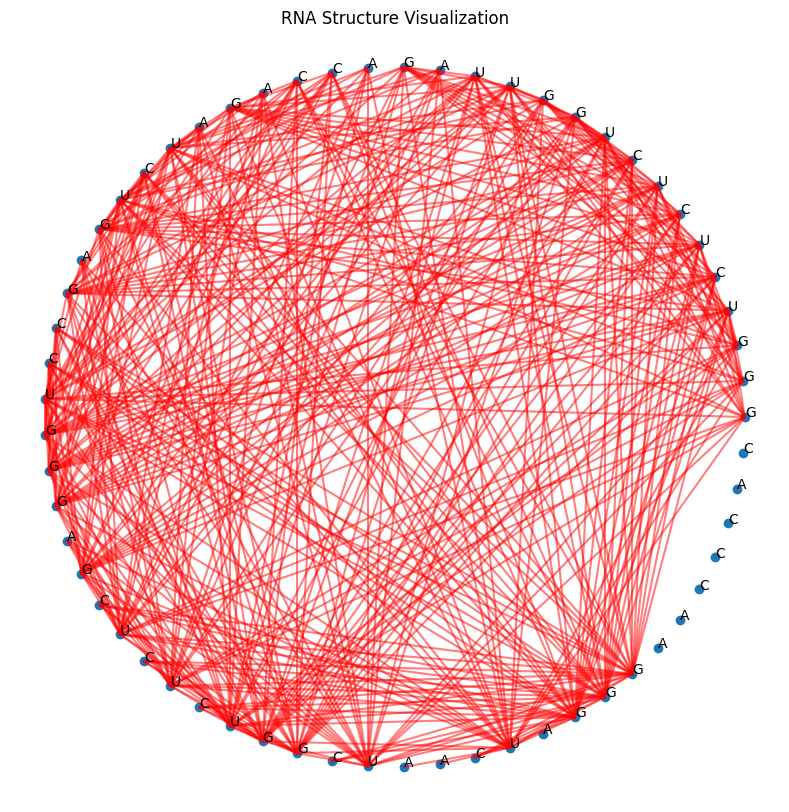

In [13]:
# 4. Visualize the Structure
# This part creates a circular plot of the RNA sequence with base pairings shown as lines.
import matplotlib.pyplot as plt

def visualize_rna_structure(sequence, pairing_matrix):
    fig, ax = plt.subplots(figsize=(10, 10))
    n = len(sequence)
    
    # Plot the sequence as a circle
    theta = np.linspace(0, 2*np.pi, n, endpoint=False)
    x = np.cos(theta)
    y = np.sin(theta)
    ax.scatter(x, y)
    
    # Add base labels
    for i, base in enumerate(sequence):
        ax.annotate(base, (x[i], y[i]))
    
    # Draw base pairings
    for i in range(n):
        for j in range(i+1, n):
            if pairing_matrix[i][j]:
                ax.plot([x[i], x[j]], [y[i], y[j]], 'r-', alpha=0.5)
    
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title("RNA Structure Visualization")
    plt.show()

# Usage
visualize_rna_structure(seq, pairing_matrix)

In [8]:
"""
Next Steps / TBD
Refine energy calculations using more accurate parameters.
Implement methods for predicting tertiary interactions.
Add comparative sequence analysis if multiple related sequences are available.
Consider incorporating machine learning models for improved accuracy.
Implement validation against known structures or experimental data.
"""

'\nNext Steps / TBD\nRefine energy calculations using more accurate parameters.\nImplement methods for predicting tertiary interactions.\nAdd comparative sequence analysis if multiple related sequences are available.\nConsider incorporating machine learning models for improved accuracy.\nImplement validation against known structures or experimental data.\n'